In [48]:
from IPython.display import Image as PythonImg
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

#### Function to superimpose text on image:


In [133]:
def cover(top,bottom ):
    import requests
    name='album_image.png'
    album_cover = requests.get('https://picsum.photos/g/500/?random')
    with open(name,'wb') as album_image_file:
       album_image_file.write(album_cover.content)
    img = Image.open("album_image.png")
    draw = ImageDraw.Draw(img)
    band_name_font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 25) 
    album_name_font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 20)
    band_x, band_y = 50,300
    album_x, album_y = 300, 50
    outline_color ="black"

    draw.text((band_x-1, band_y-1), top, font=band_name_font, fill=outline_color)
    draw.text((band_x+1, band_y-1), top, font=band_name_font, fill=outline_color)
    draw.text((band_x-1, band_y+1), top, font=band_name_font, fill=outline_color)
    draw.text((band_x+1, band_y+1), top, font=band_name_font, fill=outline_color)

    draw.text((album_x-1, album_y-1), bottom , font=album_name_font, fill=outline_color)
    draw.text((album_x+1, album_y-1), bottom , font=album_name_font, fill=outline_color)
    draw.text((album_x-1, album_y+1), bottom , font=album_name_font, fill=outline_color)
    draw.text((album_x+1, album_y+1), bottom , font=album_name_font, fill=outline_color)

    draw.text((band_x,band_y),top,(255,255,255),font=band_name_font)
    draw.text((album_x, album_y),bottom,(255,255,255),font=album_name_font)

    return img

In [134]:
import requests

The URL to the random Wikipedia page:

In [135]:
wiki_link='https://en.wikipedia.org/wiki/Special:Random'

 Convert the page to a string:

In [136]:
random_wikipedia_page=requests.get(wiki_link)

 Extract the XML as a text file a string:

In [137]:
page=str(random_wikipedia_page.text)
print(page)

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Patrick Manning - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Patrick_Manning","wgTitle":"Patrick Manning","wgCurRevisionId":865406288,"wgRevisionId":865406288,"wgArticleId":393850,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","Articles needing additional references from July 2016","All articles needing additional references","Use British English from May 2013","Use dmy dates from May 2013","Pages using infobox officeholder with unknown parameters","All articles with unsourced statements","Articles with unsou

 Use the title of the Wikipedia article as the title of the band:

In [138]:
start=page.find('<title>')
print(start)
end=page.find('</title>')
print(end)
title_raw=page[start+len('<title>'):end]
print(title_raw)

94
128
Patrick Manning - Wikipedia


Remove the term Wikipedia from the title:

In [139]:
band_title=title_raw.replace(" - Wikipedia","")
print(band_title)

Patrick Manning


 Extract the title of a second Wikipedia article and use the result to album_title:

In [140]:
wikipedia_link1='https://en.wikipedia.org/wiki/Special:Random'
raw_random_wikipedia_page1=requests.get(wikipedia_link1)
page1=str(raw_random_wikipedia_page1.text)
print(page1)
start1=page1.find('<title>')
print(start1)
end1=page1.find('</title>')
print(end1)
title_raw1=page1[start1+len('<title>'):end1]
print(title_raw1)
album_title=title_raw1.replace(" - Wikipedia","")
print(album_title)

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>We Are Balboa - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"We_Are_Balboa","wgTitle":"We Are Balboa","wgCurRevisionId":886569583,"wgRevisionId":886569583,"wgArticleId":14021826,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with hCards","Wikipedia articles with MusicBrainz identifiers","Spanish rock music groups"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March

In [141]:
print("Your band: ", band_title)
print("Your album: ", album_title)

Your band:  Patrick Manning
Your album:  We Are Balboa


Display the fake album cover:

In [142]:
album_cover=cover(top=band_title,bottom=album_title)

In [143]:
album_cover.save('sample-out.png')

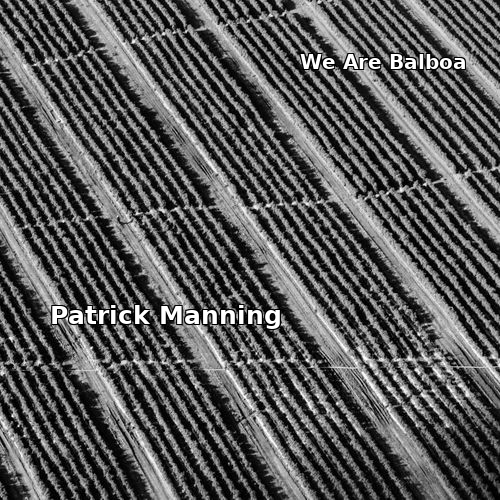

In [144]:
IPythonImage(filename='sample-out.png')